# Parametric Tests

## Tasks

### Task 1

Our basic algorithm provides 10% conversion. A new algorithm provides 11.3% convsersion.  
We've made 1000 calls to each groups.   
Is the difference in conversions statistically signigicant?

In [1]:
from scipy.stats import binomtest

In [2]:
result = binomtest(113, 1000, 0.1, alternative='two-sided')

In [3]:
alpha = 0.05

if result.pvalue < alpha:
    print(f'p-value = {result.pvalue:.4f} --> The result is statistically significant')
else:
    print(f'p-value = {result.pvalue:.4f} --> There is no statistically siginificant difference.')

p-value = 0.1705 --> There is no statistically siginificant difference.


### Task 2

Suppose we are checking whether the average temperature in our city has changed.  
We conducted 100 measurements at different times of the day and in different places, obtained:
- a mean value of 18.1 degrees, 
- the sample standard deviation of 8.2 degrees.   

We want to check if the average temperature has changed if it previously was 16.5 degrees.  
Calculate the p-value for the Student's t-test, alternative hypothesis is two-sided.

In [4]:
from scipy.stats import t

In [5]:
prev_temp = 16.5
now_temp = 18.1
std = 8.2
sample_size = 100

In [6]:
t_statistic = (now_temp - prev_temp) / (std / sample_size**.5)

In [7]:
ddof = sample_size - 1

In [8]:
p_value = t.sf(t_statistic, ddof) * 2

In [9]:
alpha = 0.05

if p_value < alpha:
    print(f'p-value = {p_value:.4f} --> The result is statistically significant')
else:
    print(f'p-value = {p_value:.4f} --> There is no statistically siginificant difference.')

p-value = 0.0539 --> There is no statistically siginificant difference.


### Task 3

Let's use `California Housing` dataset with average house prices.  
Let's estimate whether the average incomes in the areas where houses are younger than 30 years and older than 30 years are different.  
Use statistical criteria to check whether the averages are equal.  

In [10]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 

In [11]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [12]:
med_inc_younger = df[df['HouseAge'] < 30].MedInc
med_inc_older = df[df['HouseAge'] > 30].MedInc

In [13]:
from scipy.stats import ttest_ind

In [14]:
_, p_value = ttest_ind(med_inc_younger, med_inc_older)

In [15]:
alpha = 0.05

if p_value < alpha:
    print(f'p-value = {p_value:.4f} --> The result is statistically significant')
else:
    print(f'p-value = {p_value:.4f} --> There is no statistically siginificant difference.')

p-value = 0.0000 --> The result is statistically significant


### Task 4

Build histograms for the data and calculate the mean statistics. 

In [16]:
import numpy as np

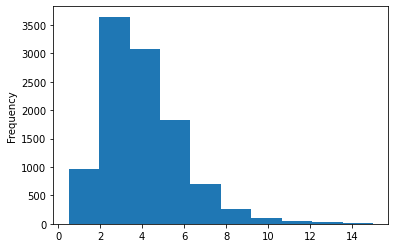

In [17]:
med_inc_younger.plot(kind='hist');

In [18]:
np.mean(med_inc_younger)

4.046167372762208

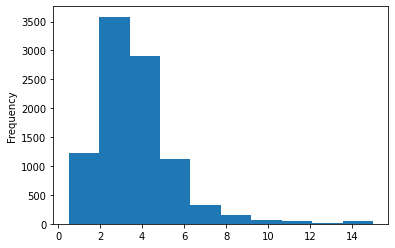

In [19]:
med_inc_older.plot(kind='hist');

In [20]:
np.mean(med_inc_older)

3.687664612954187

### Task 5

Build `qq-plot` for the data. 

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/conda/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


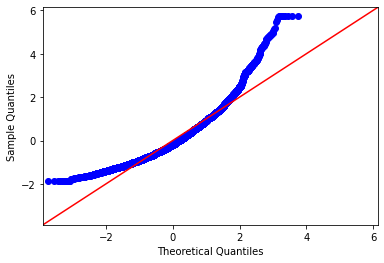

In [23]:
import statsmodels.api as sm


sm.qqplot(scaler.fit_transform(med_inc_younger.to_frame()).flatten(), line='45');

/opt/conda/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


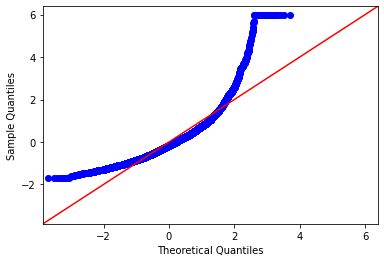

In [24]:
sm.qqplot(scaler.fit_transform(med_inc_older.to_frame()).flatten(), line='45');

### Task 6

Perform `Shapiro-Wilk` test on your data to check for data normality.

In [25]:
from scipy.stats import shapiro

In [26]:
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
shapiro(med_inc_younger)

/opt/conda/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9230860471725464, pvalue=0.0)

In [27]:
shapiro(med_inc_older)

ShapiroResult(statistic=0.8525030612945557, pvalue=0.0)

### Task 7

Check the normality of data using `qq-plot` after log-transform.

In [28]:
med_inc_younger_log = np.log1p(med_inc_younger)
med_inc_older_log = np.log1p(med_inc_older)

/opt/conda/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


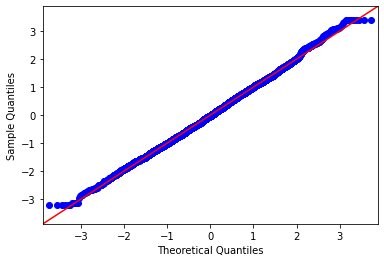

In [29]:
sm.qqplot(scaler.fit_transform(med_inc_younger_log.to_frame()).flatten(), line='45');

/opt/conda/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


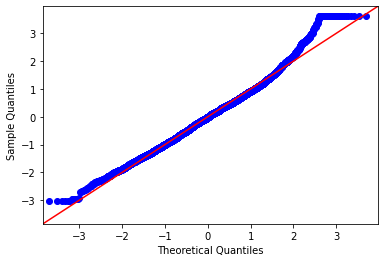

In [30]:
sm.qqplot(scaler.fit_transform(med_inc_older_log.to_frame()).flatten(), line='45');

### Task 8

Check the normality of data using `Shapiro-Wilk` test after log-transforming the data.

In [31]:
shapiro(med_inc_younger_log)

/opt/conda/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9988382458686829, pvalue=5.976854140499199e-07)

In [32]:
shapiro(med_inc_older_log)

ShapiroResult(statistic=0.9900574088096619, pvalue=3.1186841818149454e-25)

Although after log-transformation data looks like normal on `qq-plot`, `Shapiro-Wilk` test still rejects the null hypothesis that the data was drawn from a normal distribution.